In [1]:
#AI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_rolling_stats(x, y, window_size):
    """
    Calculates the rolling mean and standard error of y, based on a 
    fixed-number-of-points window, after sorting by x.

    Args:
        x (np.array): The x-coordinates.
        y (np.array): The y-coordinates.
        window_size (int): The number of points to include in the rolling window. 
                           This should be an odd number for a true center.

    Returns:
        tuple: (x_sorted, y_mean, y_stderr)
               x_sorted: The sorted x-values.
               y_mean: The rolling mean of y.
               y_stderr: The rolling standard error of y.
    """
    # Create a DataFrame and sort by x to ensure the window is sequential
    df = pd.DataFrame({'x': x, 'y': y}).sort_values('x')
    
    # Use 'center=True' to make the window centered on the current point
    # Use 'min_periods=1' to get calculations even for partial windows at the edges
    rolling_y = df['y'].rolling(window=window_size, center=True, min_periods=1)
    
    # Calculate mean, std, and count for the window
    y_mean = rolling_y.mean()
    y_std = rolling_y.std()
    y_count = rolling_y.count()
    
    # Calculate standard error (stderr = std / sqrt(n))
    # We use np.sqrt(y_count) as the denominator
    y_stderr = y_std / np.sqrt(y_count)
    
    # Return the sorted x values, the mean, and the stderr
    # .values returns the numpy array from the pandas Series
    return df['x'].values, y_mean.values, y_stderr.values

def plot_rolling_stats(x_points, y_points, window_size,col):
    """
    Calculates and plots the rolling statistics for the given data.
    
    Args:
        x_points (np.array): The x-coordinates.
        y_points (np.array): The y-coordinates.
        window_size (int): The size of the rolling window.
    """
    
    # --- 1. Get the moving average and standard error ---
    print(f"Calculating rolling stats with a window of {window_size} points...")
    x_sorted, y_mean, y_stderr = get_rolling_stats(x_points, y_points, window_size)

    # --- 2. Plot the results ---
    print("Plotting results...")
    #plt.figure(figsize=(12, 7))
    #plt.style.use('seaborn-v0_8-whitegrid')

    # Plot the original data as a scatter/dot plot
    plt.scatter(
        x_points, 
        y_points, 
        alpha=0.6, 
        label='Original Data (y)', 
        s=20,  # size of dots
        color='steelblue'
    )

    # Plot the rolling mean as a solid line
    plt.plot(
        x_sorted, 
        y_mean, 
        color=col, 
        linewidth=2.5, 
        label=f'Rolling Mean (window={window_size})'
    )

    # Plot the standard error as a shaded confidence band
    # (y_mean - y_stderr) is the lower bound
    # (y_mean + y_stderr) is the upper bound
    plt.fill_between(
        x_sorted,
        y_mean - y_stderr,  # Lower error bound
        y_mean + y_stderr,  # Upper error bound
        color=col,
        alpha=0.2,
        label='Standard Error (1 SE)'
    )

    # --- 3. Customize the plot ---
    plt.title('Rolling Mean and Standard Error Plot', fontsize=16)
    plt.xlabel('X-Axis', fontsize=12)
    plt.ylabel('Y-Axis', fontsize=12)
    plt.legend(fontsize=10, loc='upper left')

    # --- 4. Show the plot ---
    print("Displaying plot. Close the plot window to exit.")
    #plt.tight_layout()
    #plt.show()


Calculating rolling stats with a window of 100 points...
Plotting results...
Displaying plot. Close the plot window to exit.


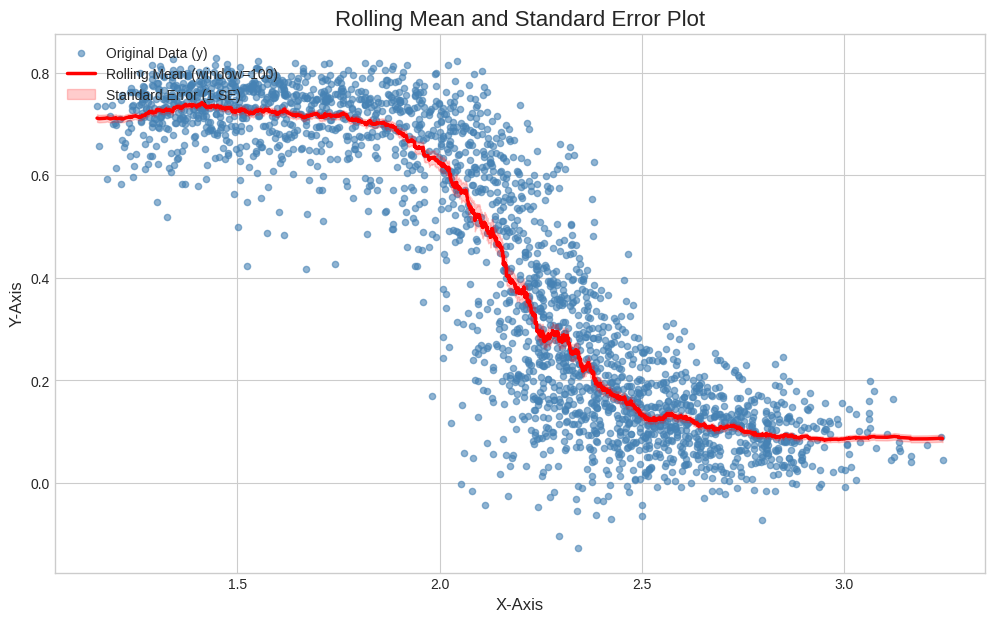

In [6]:
with open('../data/cadata.txt','r') as fh:
    cadata = np.array(eval(fh.read()))

def plotterr(c,f,col):
    cadata1 = np.transpose(c)
    T = f*2.0/np.log(1.0/cadata1[0] - 1.0)
    m_ca = -cadata1[1]
    #plt.scatter(T.clip(0,4),m_ca,color=col)
    plot_rolling_stats(T.clip(0.5,4),m_ca,100,col)

plt.figure(figsize=(12, 7))
plt.style.use('seaborn-v0_8-whitegrid')

plotterr(cadata,1,'red')
plt.show()

